In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('Math_preprocessed.csv')

In [3]:
df.head()

,Medu,Fedu,studytime,famrel,school_GP,sex_M,address_U,famsize_LE3,Pstatus_A,Mjob_health,...,guardian_father,schoolsup_no,famsup_no,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_no,Grade
0,1.00,1.00,0.333333,0.75,1,0,1,0,1,0,...,0,0,1,0,0,1,1,0,1,5.666667
1,0.25,0.25,0.333333,1.00,1,0,1,0,0,0,...,1,1,0,0,0,0,1,1,1,5.333333
2,0.25,0.25,0.333333,0.75,1,0,1,1,0,0,...,0,0,1,1,0,1,1,1,1,8.333333
3,1.00,0.50,0.666667,0.50,1,0,1,0,0,1,...,0,1,0,1,1,1,1,1,0,14.666667
4,0.75,0.75,0.333333,0.75,1,0,1,0,0,0,...,1,1,0,1,0,1,1,0,1,8.666667


In [5]:
#Identify input and target columns
input_cols,target_cols=df.columns[:-1],df.columns[-1]
input_df,targets=df[input_cols].copy(),df[target_cols].copy()

In [6]:
X_train,X_test,y_train,y_test=train_test_split(input_df,targets,test_size=0.10,random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_
})
importances = importances.sort_values(by='Importance', ascending=False)

In [9]:
importances

,Attribute,Importance
22,higher_yes,2.887879
2,studytime,2.462600
13,Fjob_teacher,1.550313
0,Medu,1.361329
17,schoolsup_no,1.359022
18,famsup_no,1.095519
1,Fedu,0.947588
5,sex_M,0.892902
9,Mjob_health,0.850995
24,romantic_no,0.677515


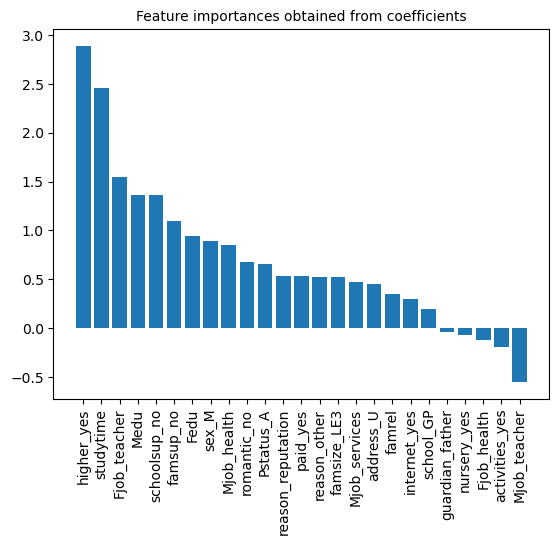

In [10]:
plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

In [11]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

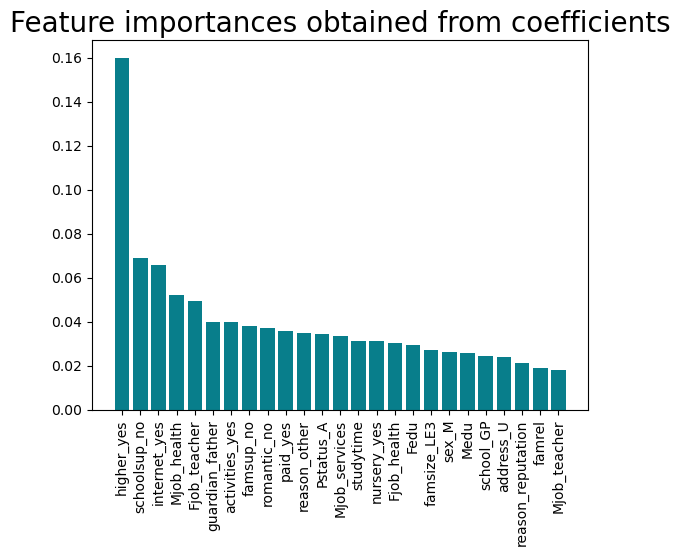

In [12]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

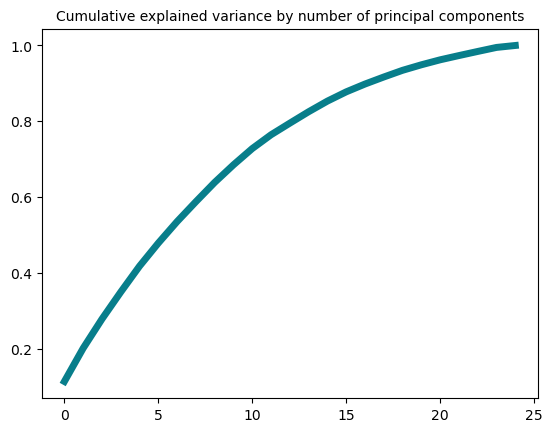

In [16]:
from sklearn.decomposition import PCA

pca = PCA().fit(X_train)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=5, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=10)
plt.show()

In [17]:
loadings = pd.DataFrame(
    data=pca.components_.T * np.sqrt(pca.explained_variance_), 
    columns=[f'PC{i}' for i in range(1, len(X_train.columns) + 1)],
    index=X_train.columns
)
loadings.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
Medu,-0.103879,0.116529,-0.054029,0.018287,0.022361,-0.017159,-0.008833,0.041538,0.073311,0.061518,...,0.004159,-0.007327,-0.054545,-0.010340,-0.018599,-0.002814,-0.016153,-0.002429,-0.076928,-0.093339
Fedu,-0.076090,0.090877,-0.032621,-0.000851,0.008789,-0.036034,-0.032398,0.036843,0.073807,0.016016,...,0.004891,0.009713,-0.052211,-0.040157,0.005374,-0.029155,-0.069986,0.097163,-0.002849,0.066835
studytime,-0.110843,-0.035356,0.062271,0.025690,0.015992,0.020399,-0.014091,-0.021372,-0.009904,0.019273,...,0.064419,-0.043288,-0.115622,0.141267,0.109057,0.040666,0.007773,-0.000433,-0.031282,0.014782
famrel,0.004219,0.016234,0.004267,-0.021006,-0.026650,-0.008997,0.013896,-0.006800,0.002258,0.007201,...,0.005294,-0.016685,-0.070512,0.053447,-0.055158,-0.173513,0.070519,0.012271,0.011918,0.000153
school_GP,-0.073386,0.070082,0.022751,-0.007763,-0.077471,-0.056435,-0.031652,0.012571,0.071141,0.042522,...,0.053677,-0.214132,0.017740,-0.046197,-0.010113,-0.007370,-0.025398,-0.012895,-0.001033,0.005749
